In [1]:
import sys
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import urllib
from threading import Thread
from queue import Queue
import math
import requests
import time 
from datetime import timedelta
import pickle
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('babelfyOutputTest.csv', encoding="utf-8", delimiter=",")
df.head()

,folder,cells,originalEntities,actualEntities,intersection,originalHeader,actualHeader,intersectionHeader,class
0,31,2640,141,141,141,1,1,1,schema
1,31,2640,141,139,21,1,1,1,schema
2,31,2640,141,138,25,1,1,1,schema
3,31,2640,141,138,21,1,1,1,schema
4,31,2640,141,139,25,1,1,1,schema


In [20]:
df

,cells,originalEntities,actualEntities,intersection,originalHeader,actualHeader,intersectionHeader,class
0,2640,141,141,141,1,1,1,schema
1,2640,141,139,21,1,1,1,schema
2,2640,141,138,25,1,1,1,schema
3,2640,141,138,21,1,1,1,schema
4,2640,141,139,25,1,1,1,schema
5,2640,141,139,28,1,1,1,schema
6,2640,141,139,20,1,1,1,schema
7,2640,141,140,17,1,1,1,schema
8,2640,141,141,22,1,1,1,schema
9,2640,141,140,23,1,1,1,schema


In [3]:
del df['folder']
df.describe()

,cells,originalEntities,actualEntities,intersection,originalHeader,actualHeader,intersectionHeader
count,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000
mean,2597.089485,180.857165,149.402838,62.750698,2.679358,2.736818,2.644386
std,9889.526764,194.412443,202.899306,131.237283,11.090964,11.148275,11.070577
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,84.000000,237.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,544.000000,260.000000,260.000000,32.000000,1.000000,1.000000,1.000000
max,146125.000000,1103.000000,1103.000000,1103.000000,152.000000,152.000000,152.000000


In [22]:
df['new'] = df['actualEntities'] - df['intersection']

In [24]:
df.describe()

,cells,originalEntities,actualEntities,intersection,originalHeader,actualHeader,intersectionHeader,new
count,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000
mean,2597.089485,180.857165,149.402838,62.750698,2.679358,2.736818,2.644386,86.652140
std,9889.526764,194.412443,202.899306,131.237283,11.090964,11.148275,11.070577,170.966514
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,84.000000,237.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,544.000000,260.000000,260.000000,32.000000,1.000000,1.000000,1.000000,56.000000
max,146125.000000,1103.000000,1103.000000,1103.000000,152.000000,152.000000,152.000000,976.000000


In [23]:
df

,cells,originalEntities,actualEntities,intersection,originalHeader,actualHeader,intersectionHeader,class,new
0,2640,141,141,141,1,1,1,schema,0
1,2640,141,139,21,1,1,1,schema,118
2,2640,141,138,25,1,1,1,schema,113
3,2640,141,138,21,1,1,1,schema,117
4,2640,141,139,25,1,1,1,schema,114
5,2640,141,139,28,1,1,1,schema,111
6,2640,141,139,20,1,1,1,schema,119
7,2640,141,140,17,1,1,1,schema,123
8,2640,141,141,22,1,1,1,schema,119
9,2640,141,140,23,1,1,1,schema,117


In [9]:
df2 = df[df['originalEntities'] != df['intersection']].copy()

In [10]:
df2.head()

,cells,originalEntities,actualEntities,intersection,originalHeader,actualHeader,intersectionHeader,class
1,2640,141,139,21,1,1,1,schema
2,2640,141,138,25,1,1,1,schema
3,2640,141,138,21,1,1,1,schema
4,2640,141,139,25,1,1,1,schema
5,2640,141,139,28,1,1,1,schema


In [11]:
df2['new'] = df2['actualEntities'] - df2['intersection']

In [21]:
df2

,cells,originalEntities,actualEntities,intersection,originalHeader,actualHeader,intersectionHeader,class,new
1,2640,141,139,21,1,1,1,schema,118
2,2640,141,138,25,1,1,1,schema,113
3,2640,141,138,21,1,1,1,schema,117
4,2640,141,139,25,1,1,1,schema,114
5,2640,141,139,28,1,1,1,schema,111
6,2640,141,139,20,1,1,1,schema,119
7,2640,141,140,17,1,1,1,schema,123
8,2640,141,141,22,1,1,1,schema,119
9,2640,141,140,23,1,1,1,schema,117
10,2640,141,140,16,1,1,1,schema,124


In [8]:
df2.describe()

,cells,originalEntities,actualEntities,intersection,originalHeader,actualHeader,intersectionHeader,new
count,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000
mean,3097.718936,262.294523,198.814867,27.073396,4.213772,4.331142,4.147105,171.741471
std,10992.484015,190.711376,226.900888,83.041120,14.284500,14.361309,14.259121,208.391330
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,141.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,78.000000,260.000000,147.000000,0.000000,0.000000,0.000000,0.000000,42.500000
75%,1332.000000,260.000000,324.750000,13.000000,5.000000,5.000000,5.000000,260.000000
max,146125.000000,977.000000,987.000000,733.000000,152.000000,152.000000,152.000000,976.000000


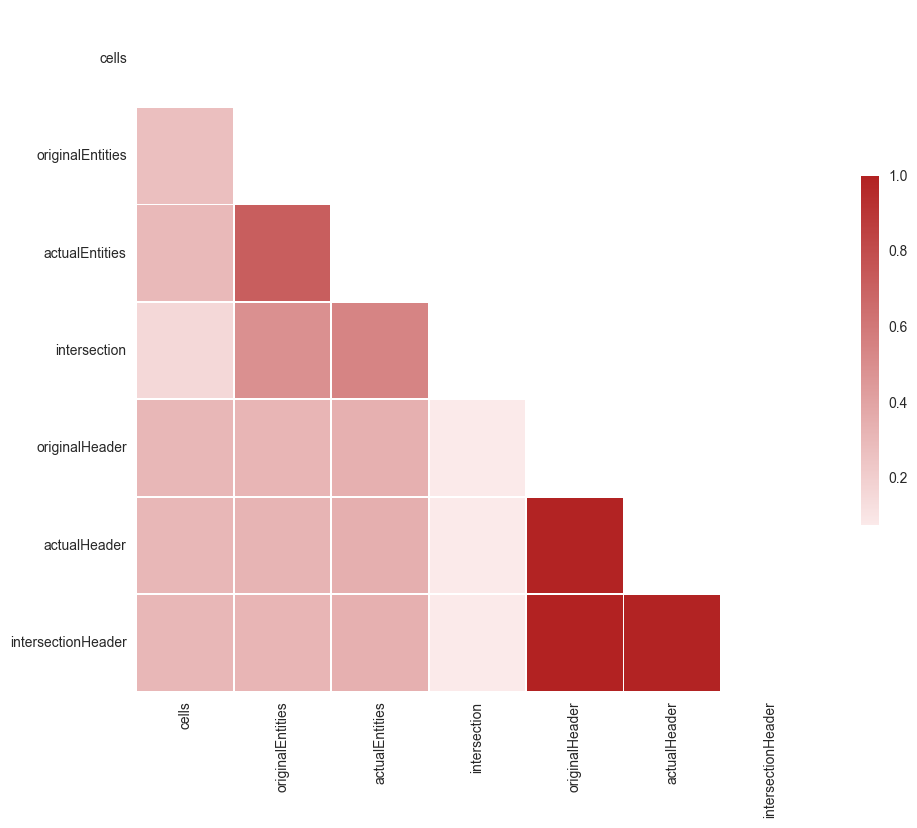

In [13]:
sns.set(style="white")
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.light_palette('firebrick', as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
sns.plt.savefig("pictures/heatmapbabelfy.pdf")

sns.plt.show()

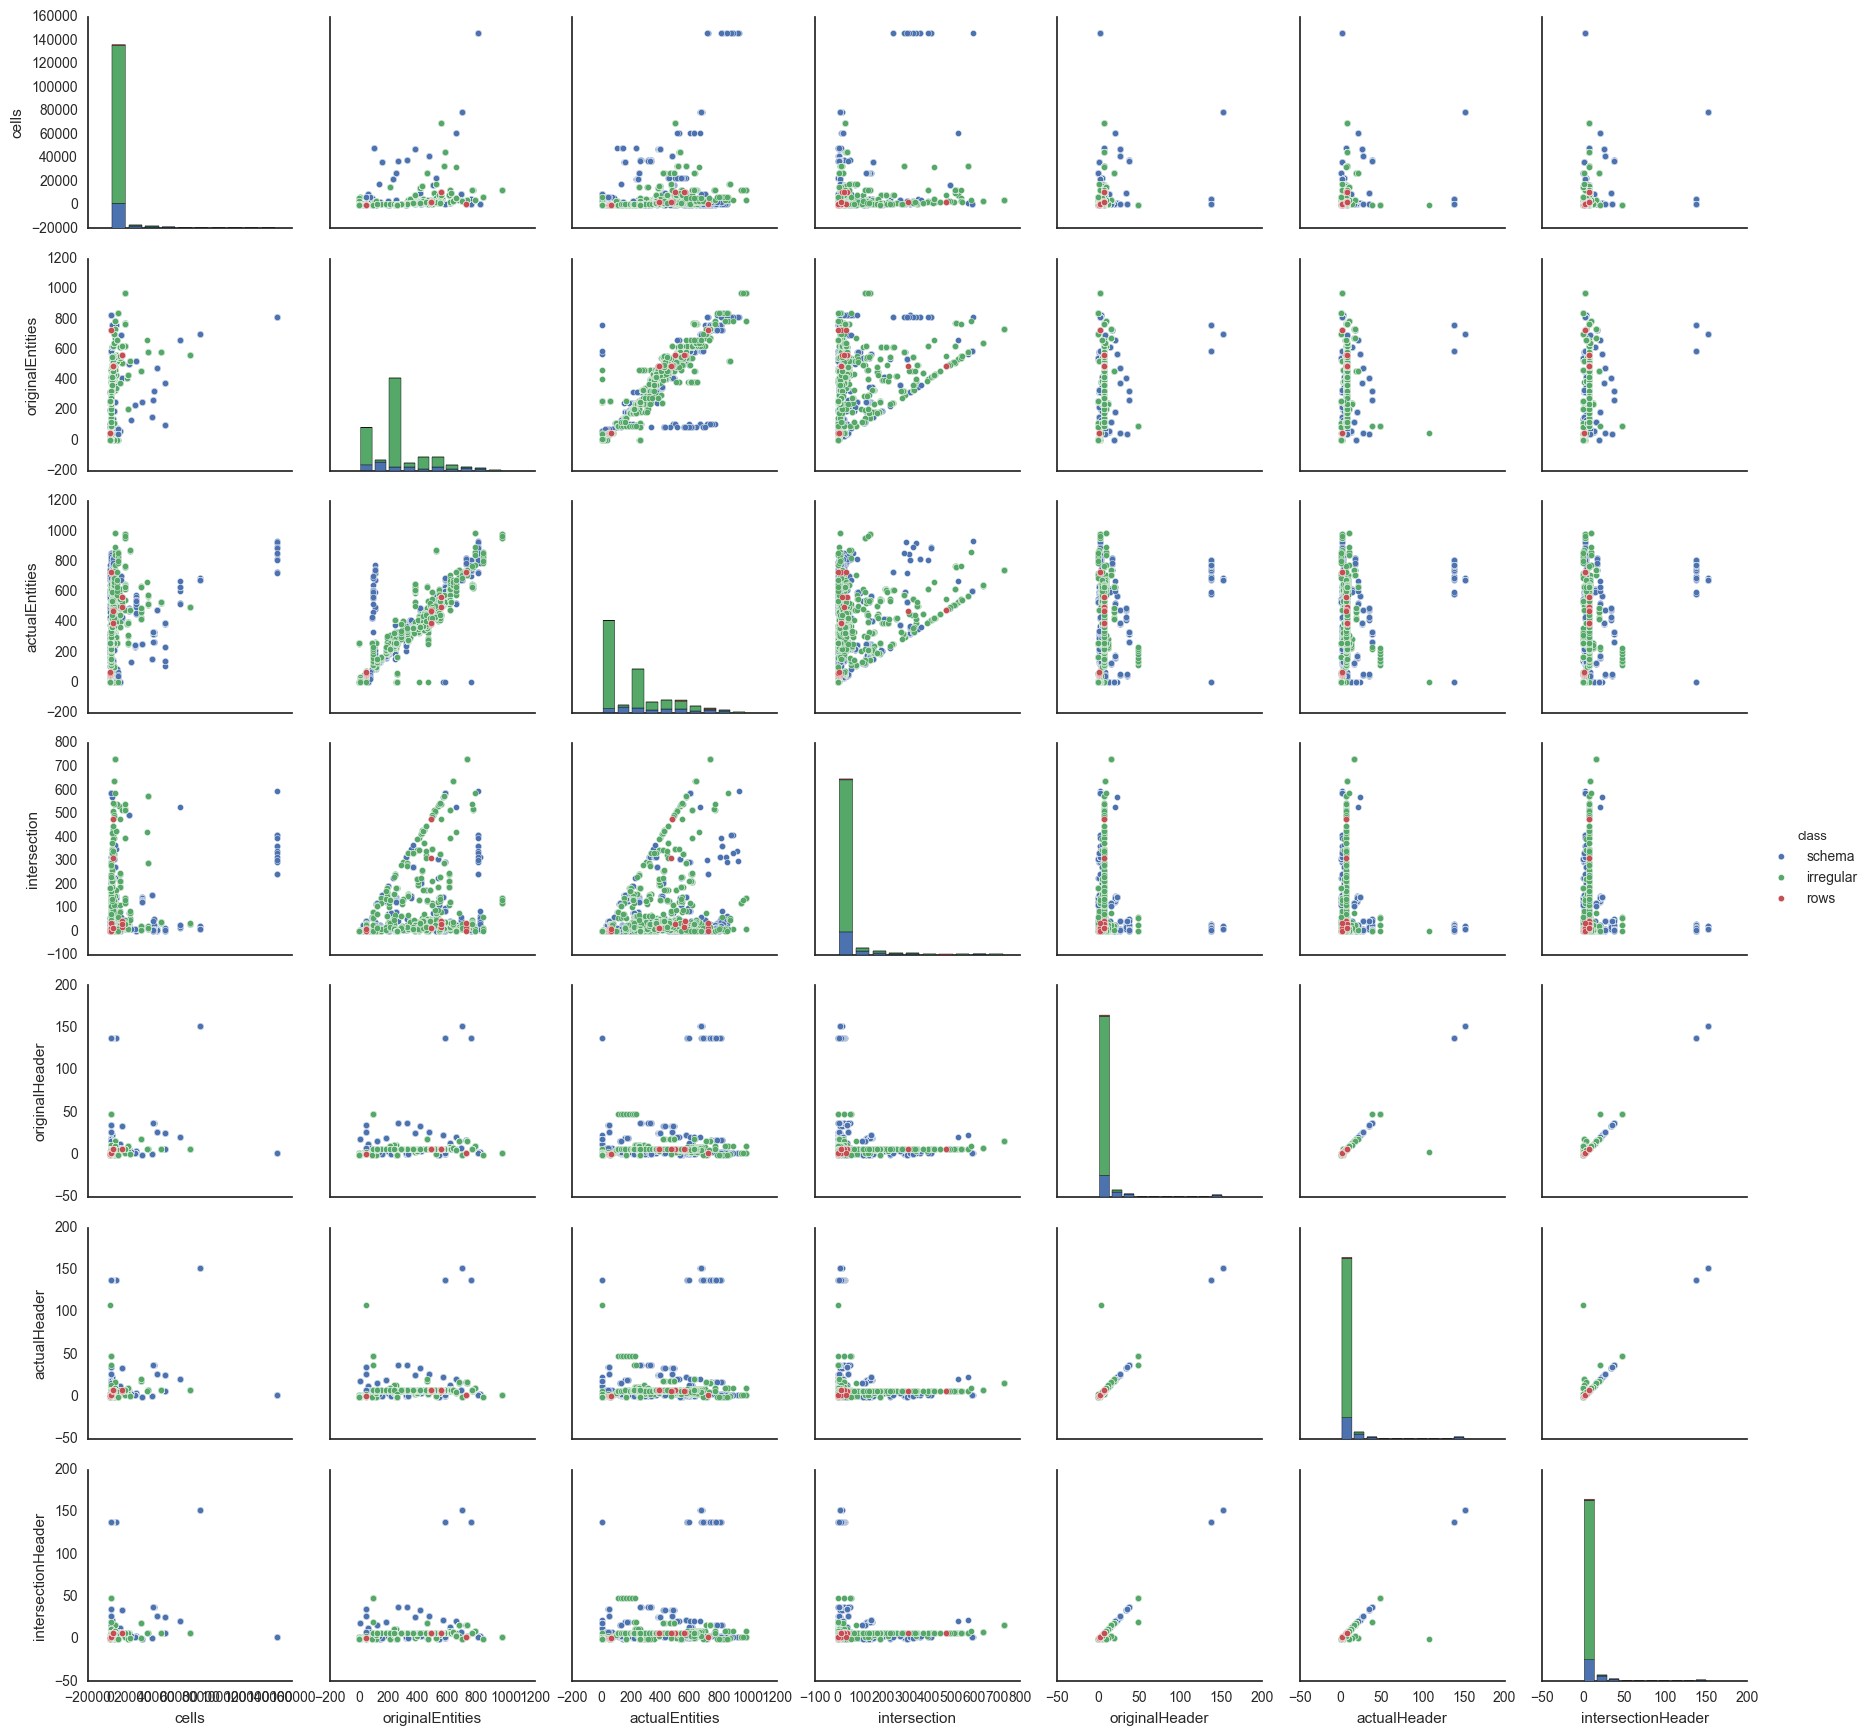

In [157]:
g = sns.pairplot(df, hue='class')
sns.plt.savefig("pictures/pairplotbabelfy.png")

sns.plt.show()

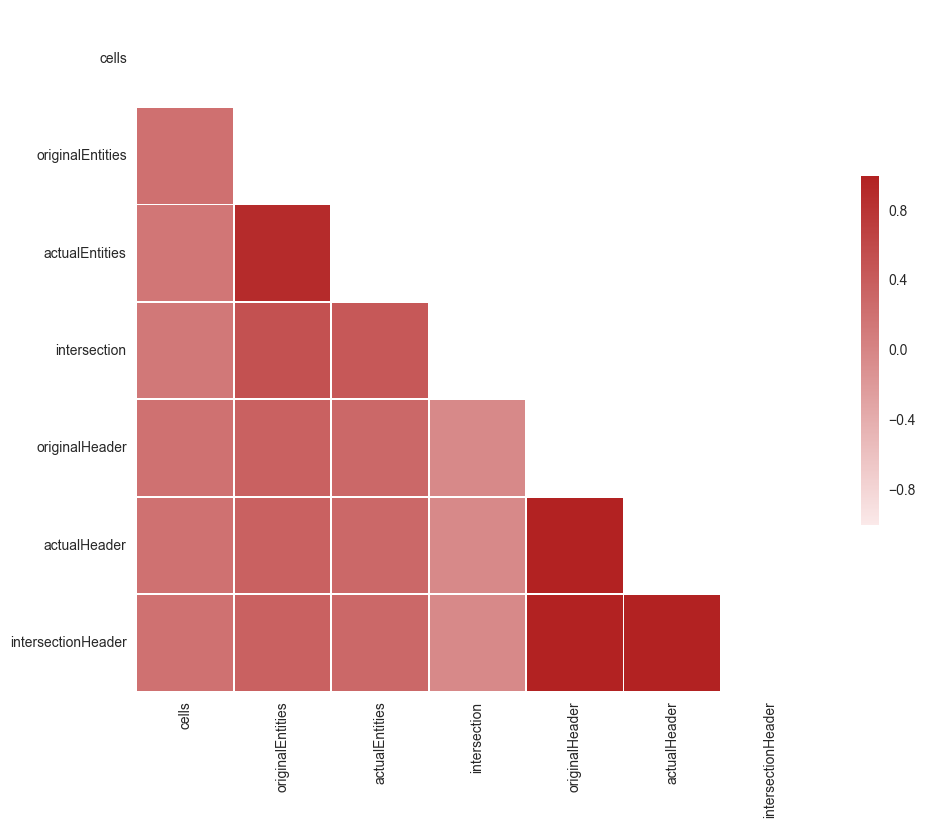

In [14]:
sns.set(style="white")
corr = df[df['class'] == 'schema'].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.light_palette('firebrick', as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
sns.plt.savefig("pictures/heatmapbabelfyschema.pdf")

sns.plt.show()

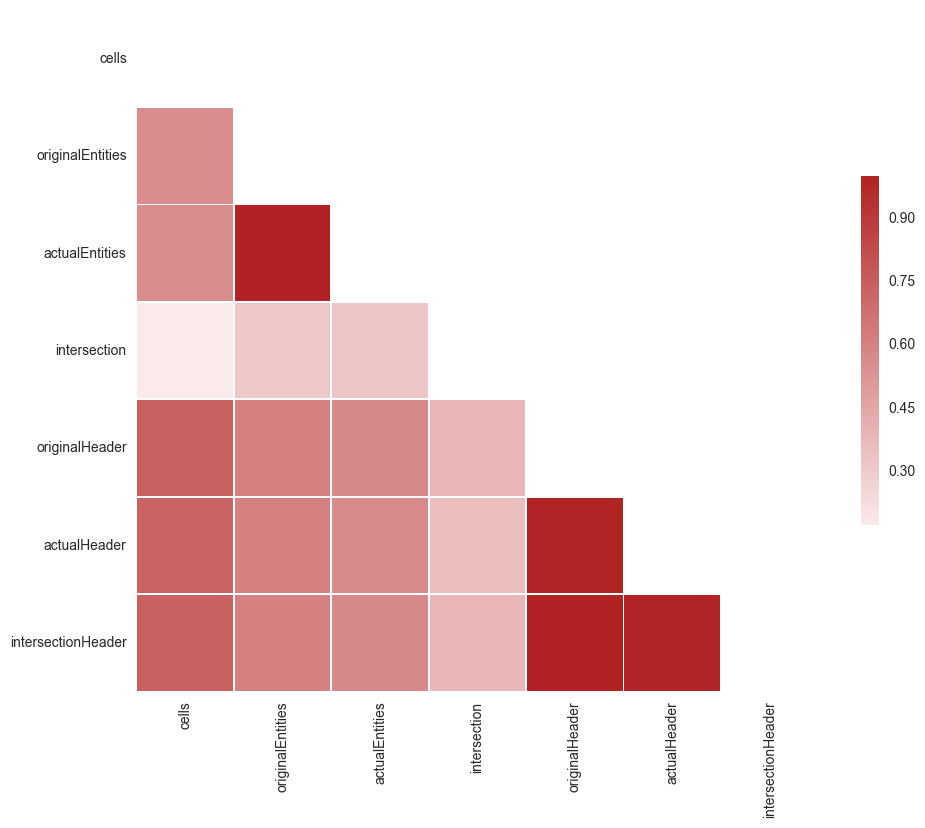

In [19]:
sns.set(style="white")
corr = df[df['class'] == 'rows'].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.light_palette('firebrick', as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
sns.plt.savefig("pictures/heatmapbabelfyrows.pdf")

sns.plt.show()

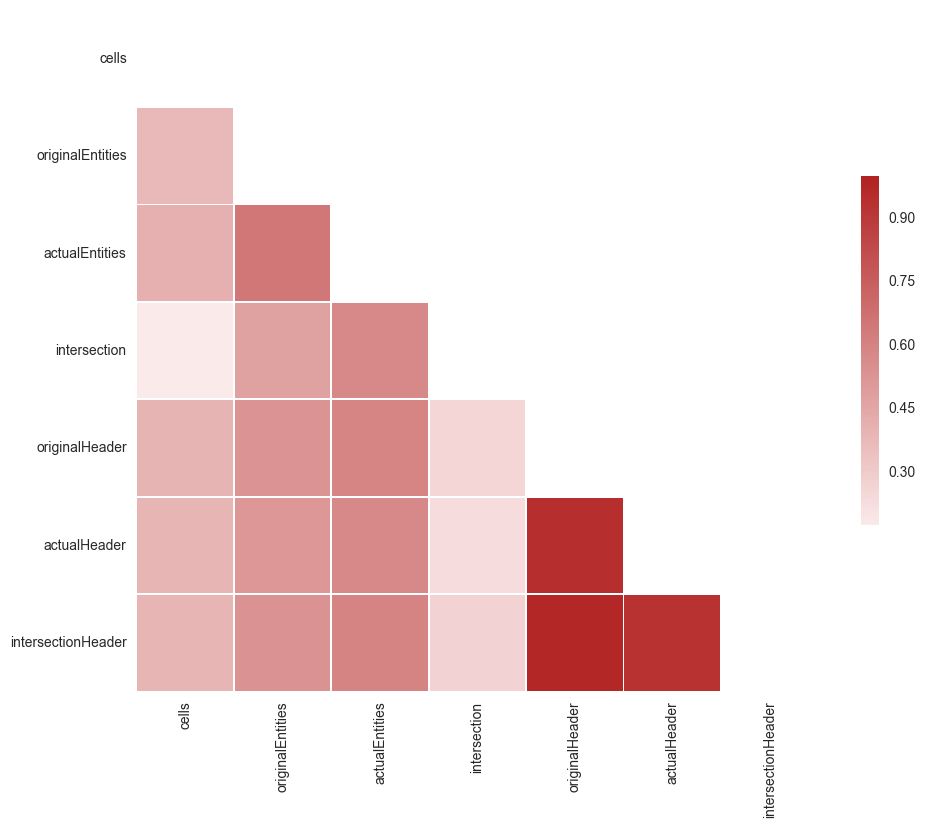

In [18]:
sns.set(style="white")
corr = df[(df['class'] == 'irregular') ].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.light_palette('firebrick', as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

sns.plt.savefig("pictures/heatmapbabelfyirregular.pdf")

sns.plt.show()

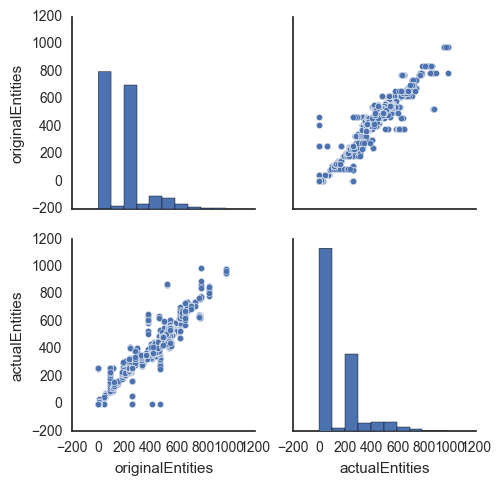

In [16]:
g = sns.pairplot(df[df['class'] == 'irregular'], vars=["originalEntities", "actualEntities"])
sns.plt.savefig("pictures/originalactualirregular.pdf")
sns.plt.show()

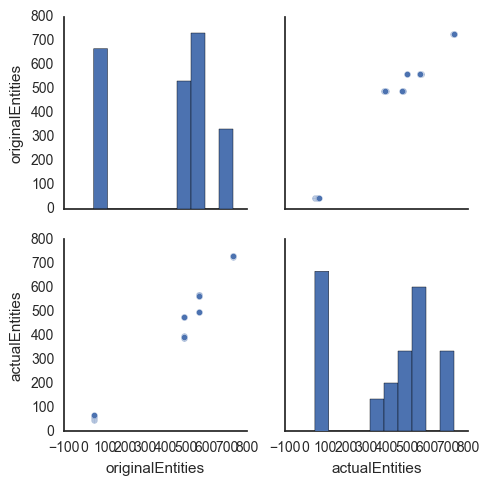

In [143]:
g = sns.pairplot(df2[df2['class'] == 'rows'], vars=["originalEntities", "actualEntities"])
sns.plt.savefig("pictures/originalactualrows.pdf")

sns.plt.show()

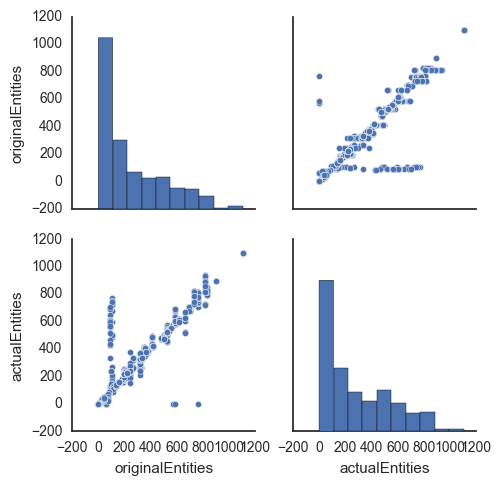

In [17]:
g = sns.pairplot(df[df['class'] == 'schema'], vars=["originalEntities", "actualEntities"])
sns.plt.savefig("pictures/originalactualschema.pdf")

sns.plt.show()

In [145]:
df3 = df[df['originalEntities'] != 0][['cells', 'originalEntities', 'actualEntities', 'intersection', 'class']].copy()

In [146]:
df3.describe()

,cells,originalEntities,actualEntities,intersection
count,7753.000000,7753.000000,7753.000000,7753.000000
mean,3643.861215,300.829872,211.789501,104.376757
std,11641.536835,163.632948,226.284656,155.898929
min,10.000000,1.000000,0.000000,0.000000
25%,24.000000,260.000000,0.000000,0.000000
50%,24.000000,260.000000,223.000000,14.000000
75%,2124.000000,298.000000,333.000000,260.000000
max,146125.000000,1103.000000,1103.000000,1103.000000


In [147]:
df3['new'] = (df['actualEntities'] - df['intersection']) / df['originalEntities']
df3['actualEntities'] = df['actualEntities'] / df['originalEntities']
df3['intersection'] = df['intersection'] / df['originalEntities']



In [148]:
df3.describe()

,cells,originalEntities,actualEntities,intersection,new
count,7753.000000,7753.000000,7753.000000,7753.000000,7753.000000
mean,3643.861215,300.829872,0.716022,0.378554,0.337468
std,11641.536835,163.632948,0.852232,0.458277,0.835632
min,10.000000,1.000000,0.000000,0.000000,0.000000
25%,24.000000,260.000000,0.000000,0.000000,0.000000
50%,24.000000,260.000000,0.990991,0.044740,0.000000
75%,2124.000000,298.000000,1.000000,1.000000,0.666667
max,146125.000000,1103.000000,16.500000,1.000000,16.500000


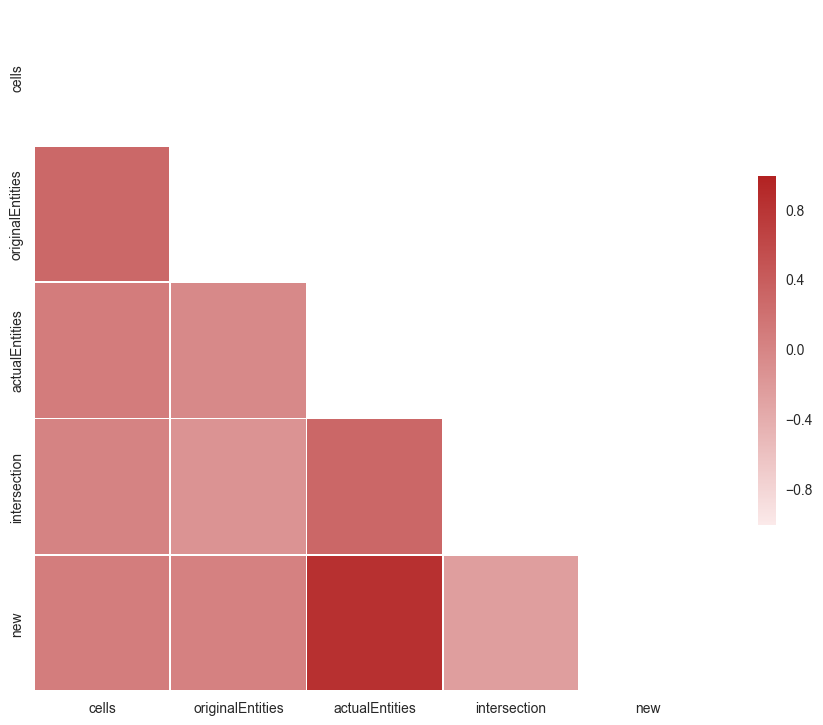

In [149]:
sns.set(style="white")
corr = df3.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.light_palette('firebrick', as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
sns.plt.savefig("pictures/heatmapbabelfy2.pdf")
sns.plt.show()

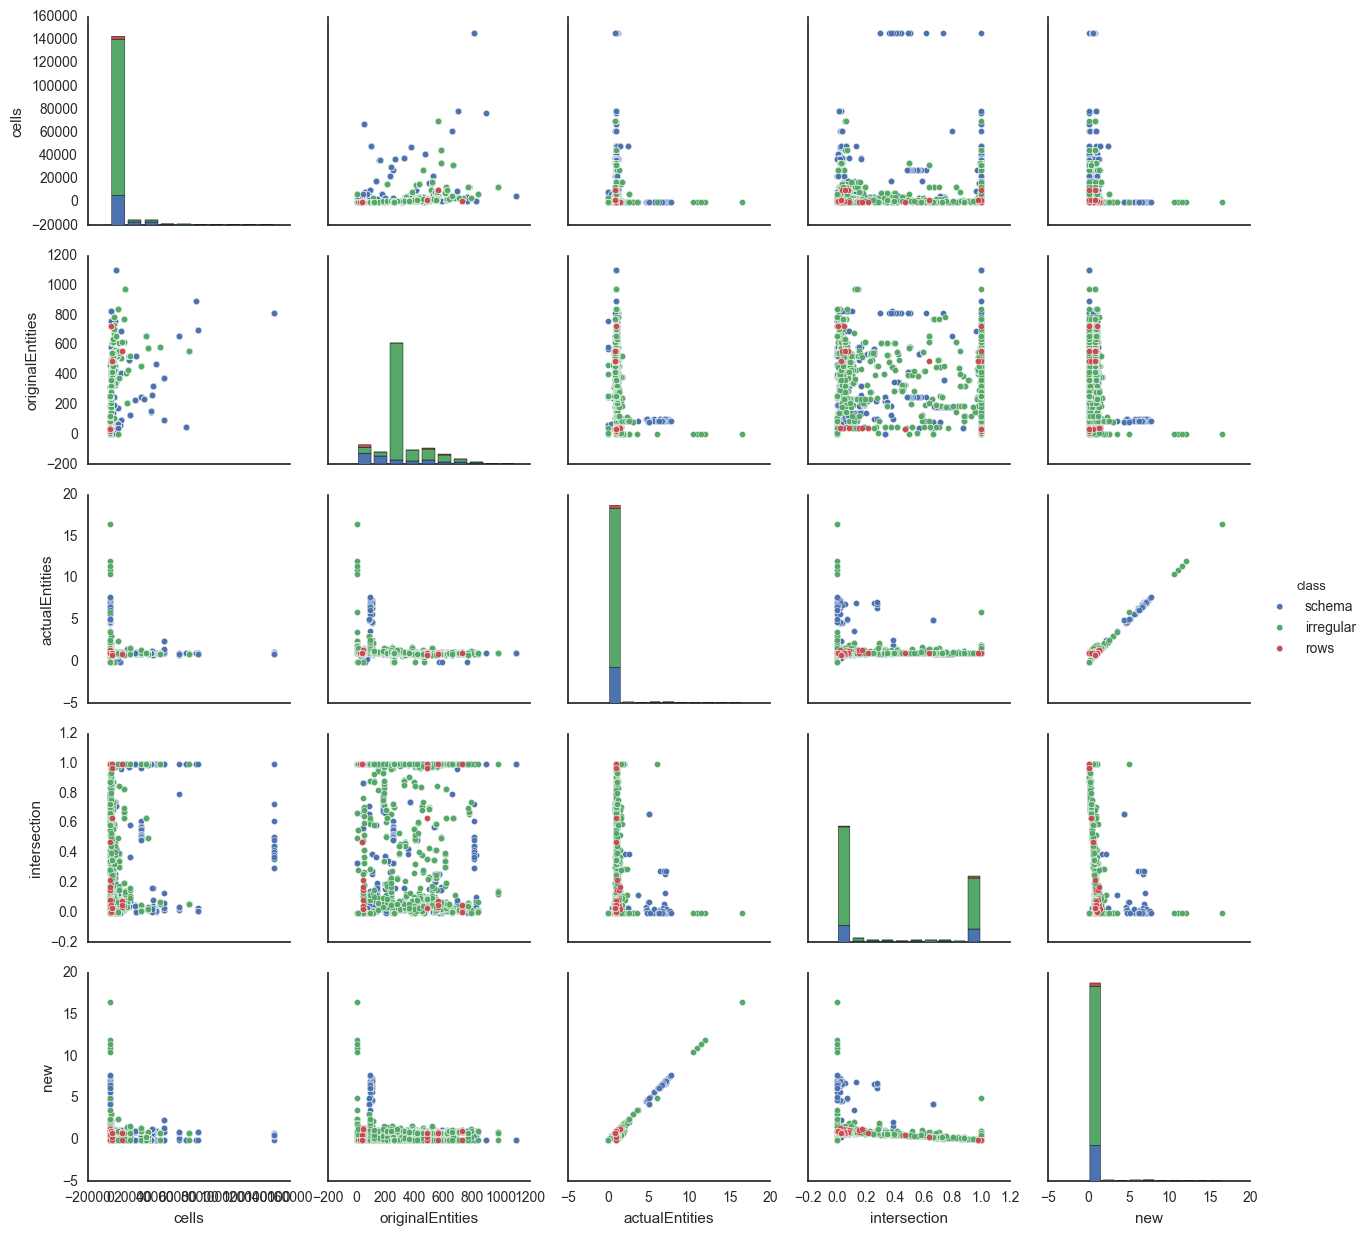

In [150]:
g = sns.pairplot(df3, hue='class')
sns.plt.savefig("pictures/pairplotbabelfy2.pdf")
sns.plt.show()

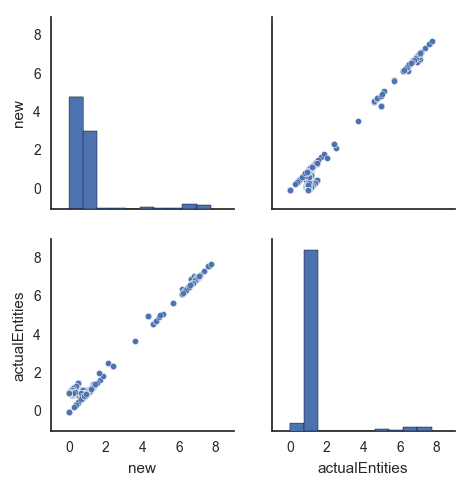

In [151]:
g = sns.pairplot(df3[df3['class'] == 'schema'], vars=["new", "actualEntities"])
sns.plt.savefig("pictures/newschema.pdf")
sns.plt.show()

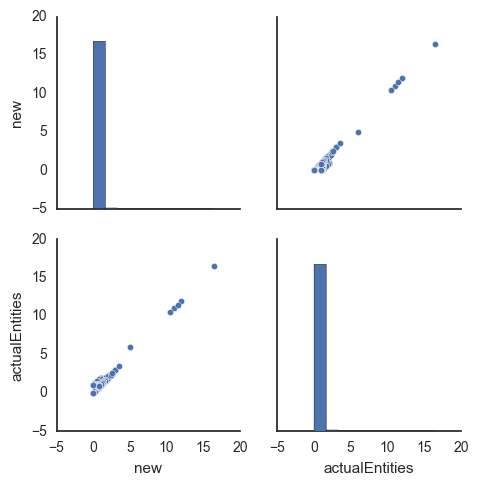

In [152]:
g = sns.pairplot(df3[df3['class'] == 'irregular'], vars=["new", "actualEntities"])
sns.plt.savefig("pictures/newirregular.pdf")

sns.plt.show()

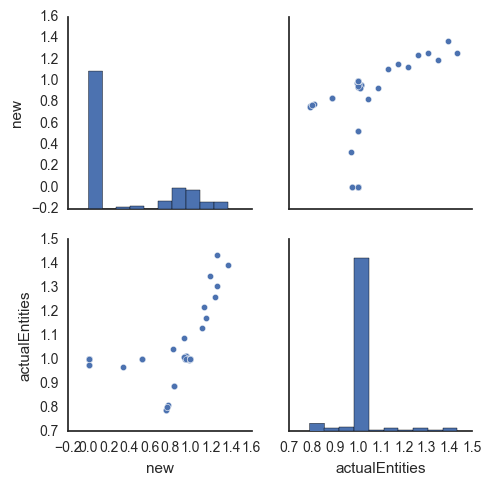

In [153]:
g = sns.pairplot(df3[df3['class'] == 'rows'], vars=["new", "actualEntities"])
sns.plt.savefig("pictures/newrows.pdf")
sns.plt.show()

In [154]:
df.describe()

,cells,originalEntities,actualEntities,intersection,originalHeader,actualHeader,intersectionHeader
count,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000
mean,2597.089485,180.857165,149.402838,62.750698,2.679358,2.736818,2.644386
std,9889.526764,194.412443,202.899306,131.237283,11.090964,11.148275,11.070577
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,84.000000,237.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,544.000000,260.000000,260.000000,32.000000,1.000000,1.000000,1.000000
max,146125.000000,1103.000000,1103.000000,1103.000000,152.000000,152.000000,152.000000


In [155]:
df3['factor'] = df3['actualEntities'] / df3['cells']

In [156]:
df3.describe()

,cells,originalEntities,actualEntities,intersection,new,factor
count,7753.000000,7753.000000,7753.000000,7753.000000,7753.000000,7753.000000
mean,3643.861215,300.829872,0.716022,0.378554,0.337468,0.010993
std,11641.536835,163.632948,0.852232,0.458277,0.835632,0.032457
min,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,260.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,260.000000,0.990991,0.044740,0.000000,0.000195
75%,2124.000000,298.000000,1.000000,1.000000,0.666667,0.006843
max,146125.000000,1103.000000,16.500000,1.000000,16.500000,1.375000
